In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd() + "/assets", f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

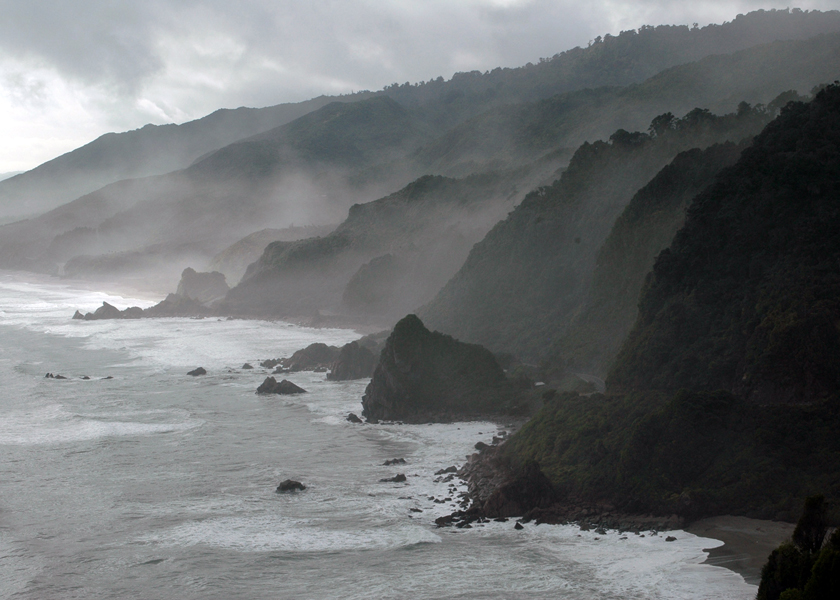

In [4]:
Image(filename="assets/New_Zealand_Coast.jpg")

Text(0.5, 1.0, 'Brighter')

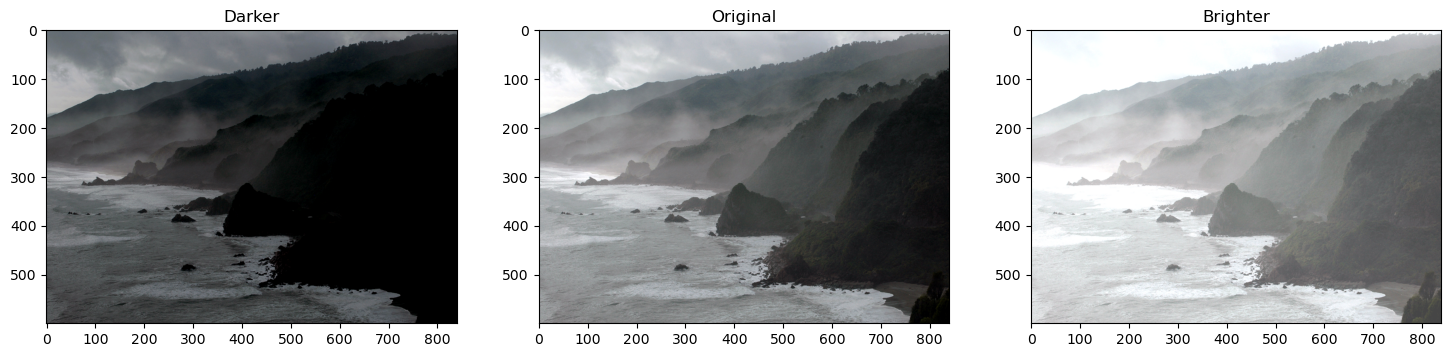

In [40]:
img = cv.imread("assets/New_Zealand_Coast.jpg", cv.IMREAD_COLOR_RGB)
offset = 70

darker = cv.subtract(img, offset)
brighter = cv.add(img, offset)

plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plt.imshow(darker)
plt.title("Darker")
plt.subplot(1,3,2)
plt.imshow(img)
plt.title("Original")
plt.subplot(1,3,3)
plt.imshow(brighter)
plt.title("Brighter")

Text(0.5, 1.0, 'High Contrast')

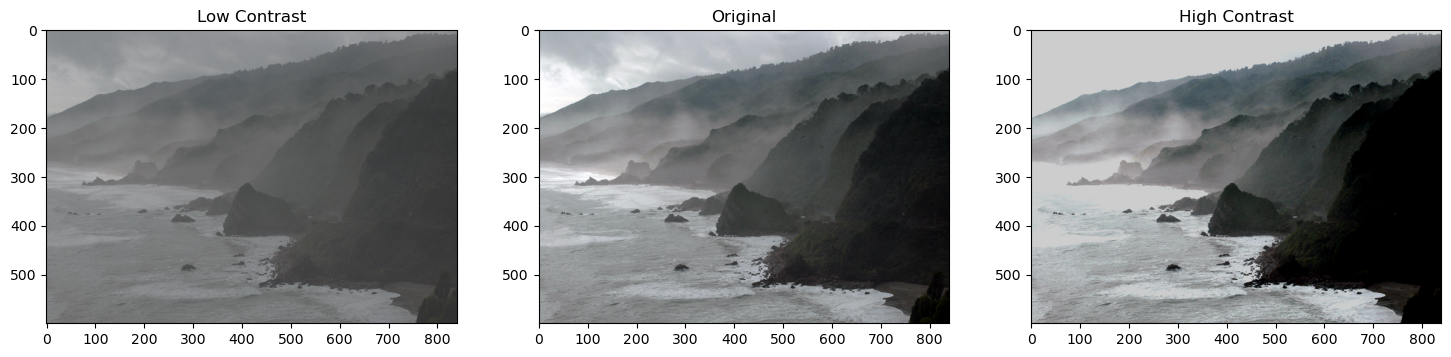

In [42]:
lowcon = cv.add(cv.multiply(img, .5), 50)
highcon = cv.subtract(cv.multiply(img, 1.5),50)

plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plt.imshow(lowcon)
plt.title("Low Contrast")
plt.subplot(1,3,2)
plt.imshow(img)
plt.title("Original")
plt.subplot(1,3,3)
plt.imshow(highcon)
plt.title("High Contrast")

Text(0.5, 1.0, 'Triangle')

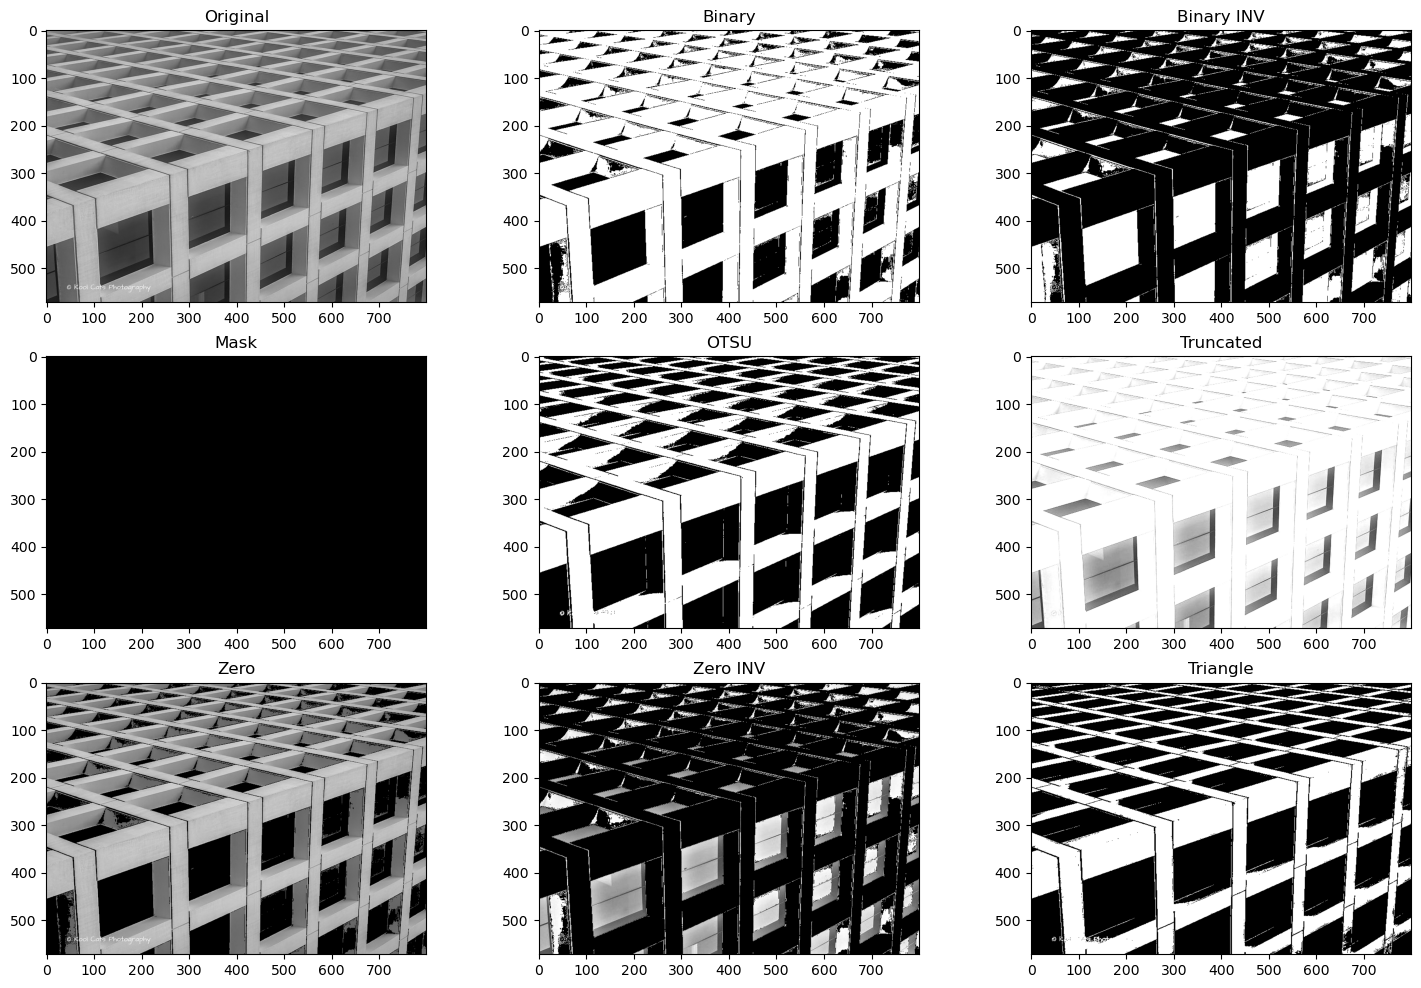

In [36]:
img = cv.imread("assets/building-windows.jpg", cv.IMREAD_GRAYSCALE)
_, imgthr = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
_, imgthri = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)
_, imgmask = cv.threshold(img, 100, 255, cv.THRESH_MASK)
_, imgotsu = cv.threshold(img, 100, 255, cv.THRESH_OTSU)
_, imgzero = cv.threshold(img, 100, 255, cv.THRESH_TOZERO)
_, imgzeroi = cv.threshold(img, 100, 255, cv.THRESH_TOZERO_INV)
_, imgtri = cv.threshold(img, 100, 255, cv.THRESH_TRIANGLE)
_, imgtrunc = cv.threshold(img, 100, 255, cv.THRESH_TRUNC)

plt.figure(figsize=[18,12])
plt.subplot(3,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(3,3,2)
plt.imshow(imgthr, cmap='gray')
plt.title("Binary")
plt.subplot(3,3,3)
plt.imshow(imgthri, cmap='gray')
plt.title("Binary INV")

plt.subplot(3,3,4)
plt.imshow(imgmask, cmap='gray')
plt.title("Mask")
plt.subplot(3,3,5)
plt.imshow(imgotsu, cmap='gray')
plt.title("OTSU")
plt.subplot(3,3,6)
plt.imshow(imgtrunc, cmap='gray')
plt.title("Truncated")

plt.subplot(3,3,7)
plt.imshow(imgzero, cmap='gray')
plt.title("Zero")
plt.subplot(3,3,8)
plt.imshow(imgzeroi, cmap='gray')
plt.title("Zero INV")
plt.subplot(3,3,9)
plt.imshow(imgtri, cmap='gray')
plt.title("Triangle")

Text(0.5, 1.0, 'Adaptive')

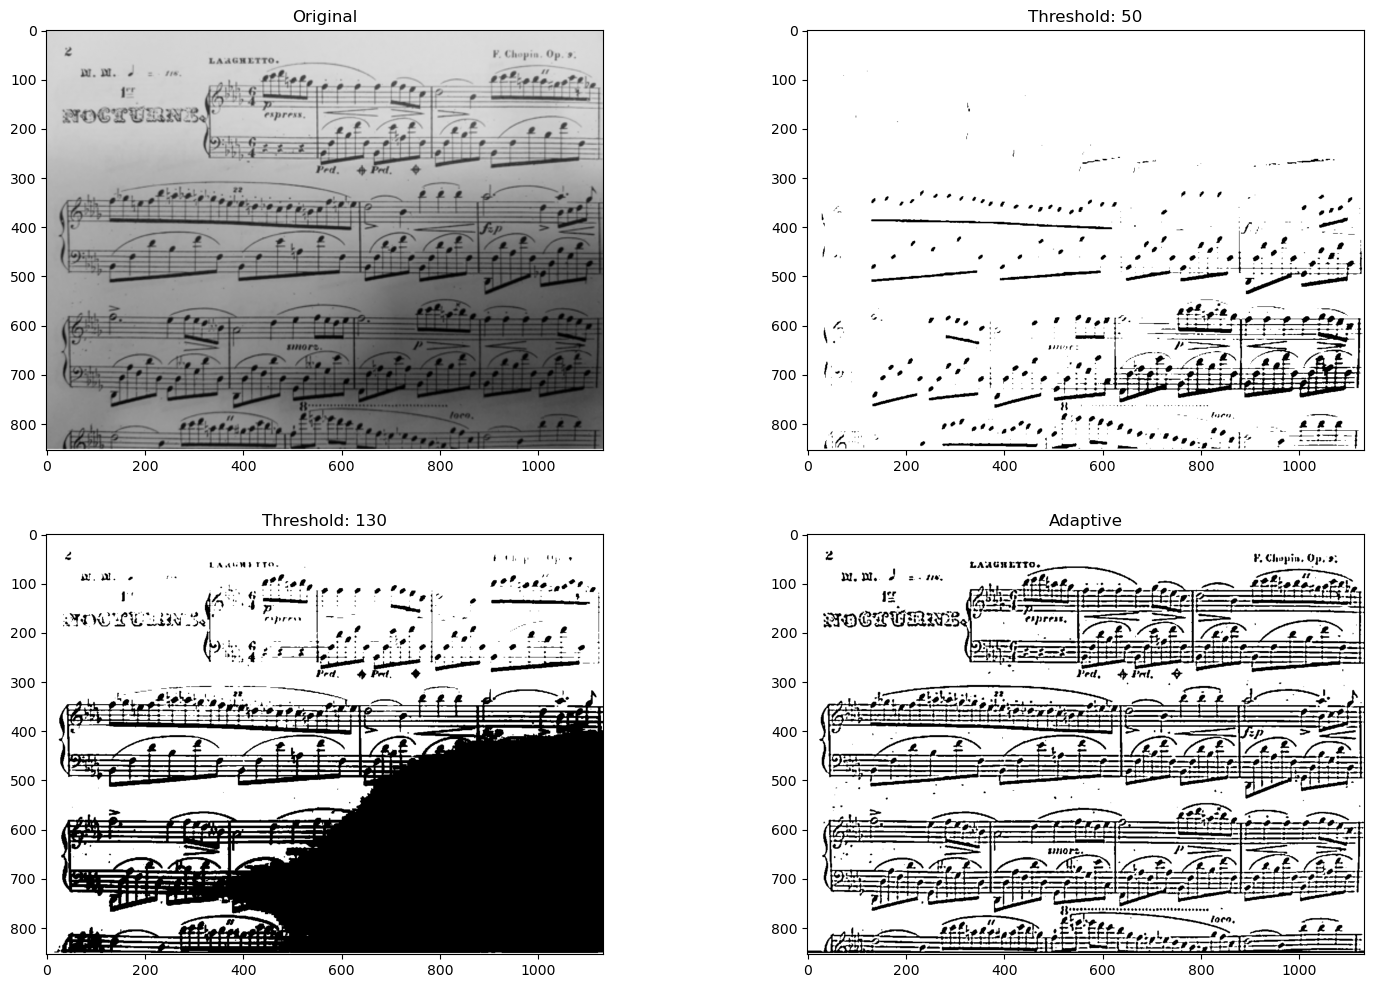

In [38]:
img = cv.imread("assets/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)
_, thresh50 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, thresh130 = cv.threshold(img, 130, 255, cv.THRESH_BINARY)
adp = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,12])
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(thresh50, cmap='gray')
plt.title("Threshold: 50")
plt.subplot(2,2,3)
plt.title("Threshold: 130")
plt.imshow(thresh130, cmap='gray')
plt.subplot(2,2,4)
plt.imshow(adp, cmap='gray')
plt.title("Adaptive")